In [52]:
import polars as pl
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# !ls output/predictions

In [38]:
# df_train = pl.read_csv("data/1_train_test_split/df_train.csv")
# df_train.group_by("stars").len()

df_justguessmode = pl.read_csv("data/1_train_test_split/df_validation.csv")
df_justguessmode = df_justguessmode.with_columns(pl.Series([5]*len(df_justguessmode)).alias("predicted"), pl.col("stars").alias("true")).select(pl.col("true", "predicted"))

In [30]:
df_openai = pl.read_csv("output/predictions/4o_offtheshelf.csv")
df_llamabase = pl.read_csv("output/predictions/llama_offtheshelf.csv")
df_llamafinetuned = pl.read_csv("output/predictions/llama_finetuned.csv")

df_mymethod = pl.read_csv("output/predictions/mymethod00.csv")

df_embedding_small = pl.read_csv("output/predictions/embedding.csv")
df_embedding_large = pl.read_csv("output/predictions/embedding_BIG.csv")

df_llamabase = df_llamabase.with_columns(pl.col("stars").alias("true"), pl.col("8b_quant_prediction").alias("predicted")).select(pl.col("true", "predicted"))

df_llamafinetuned = df_llamafinetuned.with_columns(pl.col("stars").alias("true"), pl.col("8b_quant_prediction").alias("predicted")).select(pl.col("true", "predicted"))
df_openai = df_openai.with_columns(pl.col("stars").alias("true"), pl.col("4o_prediction").alias("predicted")).select(pl.col("true", "predicted"))


In [40]:
def from_predictions_to_hitrate(df):
    assert "true" in df.columns
    assert "predicted" in df.columns

    correct, total = 0, 0
    for true, predicted in zip(df["true"].to_list(), df["predicted"].to_list()):
        if true == predicted:
            correct += 1
        total += 1
    return correct/total

In [50]:
labels = [
    "Just Guess The Mode",
    "Small Embedding+NN",
    "Just Ask Llama",
    "My Method (Hidden State+NN)",
    "Large Embedding+NN",
    "Fine Tune Llama",
    "Just Ask OpenAI's 4o",
]

hitrates = [
    from_predictions_to_hitrate(df_justguessmode),
    from_predictions_to_hitrate(df_embedding_small),
    from_predictions_to_hitrate(df_llamabase),
    from_predictions_to_hitrate(df_mymethod),
    from_predictions_to_hitrate(df_embedding_large),
    from_predictions_to_hitrate(df_llamafinetuned),
    from_predictions_to_hitrate(df_openai),
]

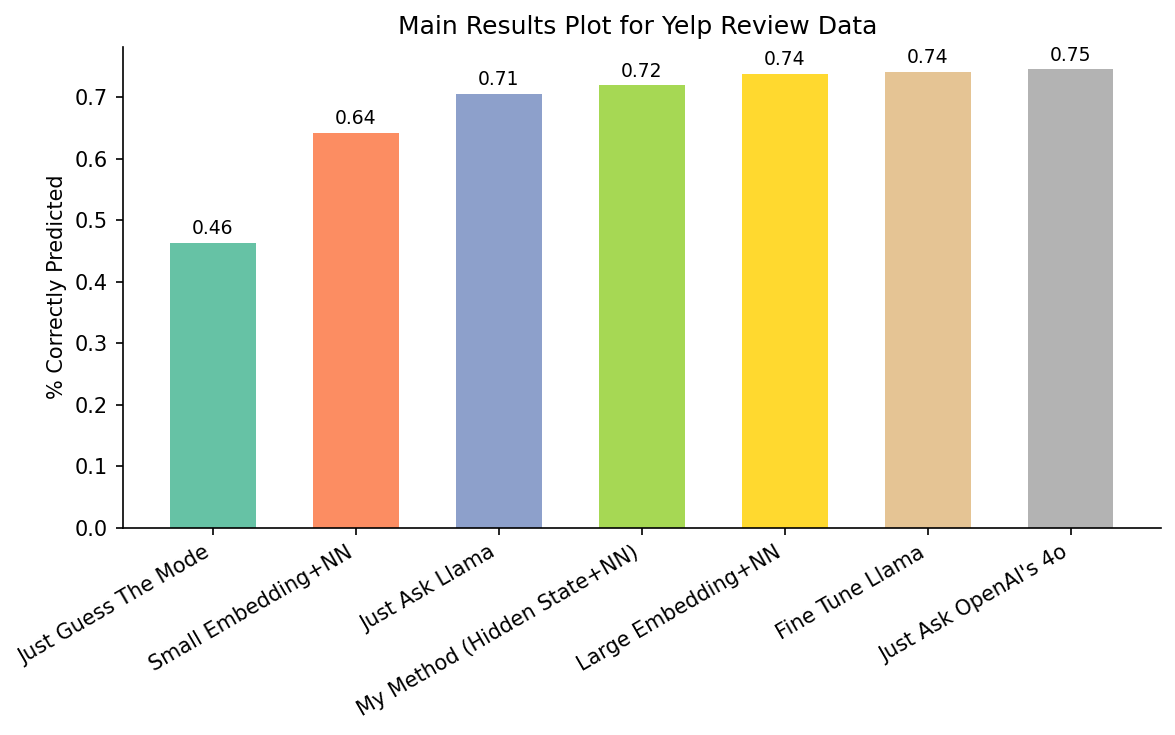

In [55]:

# Convert data to a NumPy array for convenience
hitrates = np.array(hitrates)

# Create figure and axis
plt.figure(figsize=(8, 5), dpi=150)

# Use a built-in colormap to get a clean, publication-friendly color palette
# "Set2" is often used for colorblind-safe, nice pastel colors
colors = plt.cm.Set2(np.linspace(0, 1, len(labels)))

# Create bar plot
x_positions = np.arange(len(labels))
bars = plt.bar(x_positions, hitrates, color=colors, width=0.6)

# Label each bar with its MSE value above it, formatted to 2 decimals
for x, y in zip(x_positions, hitrates):
    plt.text(
        x,
        y + 0.01 * max(hitrates),  # Slight offset above the bar
        f"{y:,.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Set tick labels
plt.xticks(x_positions, labels, rotation=30, ha='right')

# Remove gridlines/visual noise
plt.grid(False)
# Optionally remove the top and right spines for a cleaner look
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Add labels and a title (placeholder text)
plt.xlabel("")
plt.ylabel("% Correctly Predicted")
plt.title("Main Results Plot for Yelp Review Data ")

plt.tight_layout()
plt.savefig('output/graphics/1_results_for_essay.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
df = pl.read_csv("data/1_train_test_split/df_validation.csv")

star1 = df.filter(pl.col("stars")==1)
star3 = df.filter(pl.col("stars")==3)
star5 = df.filter(pl.col("stars")==5)

In [62]:
star5["text"][0]

"This place is nothing short of astounding.  I went in for my first Brazilian and decided to get a blow-out as well.  These women are incredible in every way, from their work to their personalities. I've never felt more comfortable and relaxed under such intimidating circumstances (THANKS JENNE!).  Oh, and they're both comedians, so be ready to laugh the whole time you're here :)  Can not wait to go back!"